In [1]:
import torch

x = torch.arange(12, dtype=torch.float32)
x.shape

X = x.reshape(3, -1)

print(X)

torch.zeros((2, 3, 4))

torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

print(X[-1], X[1:3], sep="\n")

X[1, 2] = 17

X[:2, :] = 12

torch.exp(x)

X = torch.arange(24, dtype=torch.float32).reshape((2, 3, 4))
Y = torch.arange(24, 48, dtype=torch.float32).reshape((2, 3, 4))
Z = torch.arange(48, 72, dtype=torch.float32).reshape((2, 4, 3))

print(X, Z)

tensor = torch.tensor([[[1, 2, 3]], [[4, 5, 6]]])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([ 8.,  9., 10., 11.])
tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]]) tensor([[[48., 49., 50.],
         [51., 52., 53.],
         [54., 55., 56.],
         [57., 58., 59.]],

        [[60., 61., 62.],
         [63., 64., 65.],
         [66., 67., 68.],
         [69., 70., 71.]]])


In [2]:
import os

os.makedirs(os.path.join("..", "data"), exist_ok=True)
data_file = os.path.join(".", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write(
        """NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000"""
    )

In [3]:
import pandas as pd

data = pd.read_csv("data/house_tiny.csv")

print(data)

inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000
   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True
   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [4]:
import pandas as pd

data = pd.read_csv("data/house_tiny.csv")

print(data)

inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000
   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True
   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [5]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
print(A)

sum_A = A.sum(dim=1, keepdim=True)
print(sum_A)

test_b = torch.tensor(
    [
        [
            3,
            3,
            3,
        ],
        [12, 12, 12],
    ],
    dtype=torch.float32,
)
print(test_b)

print(A / sum_A)
print(A / test_b)

A.cumsum(dim=0)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[ 3.],
        [12.]])
tensor([[ 3.,  3.,  3.],
        [12., 12., 12.]])
tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])
tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])


tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [6]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype=torch.float32)
print(x, y, torch.dot(x, y), sep="\n")

torch.sum(x * y)

tensor([0., 1., 2.])
tensor([1., 1., 1.])
tensor(3.)


tensor(3.)

In [7]:
A.shape, x.shape, torch.mv(A, x), A @ x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [8]:
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = torch.tensor([[10, 11, 12], [13, 14, 15], [16, 17, 18]])

print("Origin:")
print(A, B, end="\n\n", sep="\n")

print("Transposed:")
print(A.T, B.T, end="\n\n", sep="\n")

print("Transposed before sum:")
print(A.T + B.T, end="\n\n", sep="\n")

print("Transposed after sum:")
print((A + B).T, end="\n\n", sep="\n")

Origin:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

Transposed:
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
tensor([[10, 13, 16],
        [11, 14, 17],
        [12, 15, 18]])

Transposed before sum:
tensor([[11, 17, 23],
        [13, 19, 25],
        [15, 21, 27]])

Transposed after sum:
tensor([[11, 17, 23],
        [13, 19, 25],
        [15, 21, 27]])


In [9]:
(A + A.T) == (A + A.T).T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [10]:
X = torch.arange(24).reshape(2, 3, 4)
print(X)
X.sum(dim=0)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


tensor([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]])

In [11]:
print("Original tensor:")
print(A)
print()

print("Summed up along dim 1 (column):")
print(A.sum(dim=1))
print()

print("The result:")
print(A / A.sum(dim=1))

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Summed up along dim 1 (column):
tensor([ 6, 15, 24])

The result:
tensor([[0.1667, 0.1333, 0.1250],
        [0.6667, 0.3333, 0.2500],
        [1.1667, 0.5333, 0.3750]])


In [12]:
X = torch.arange(24).reshape(2, 3, 4)

print(X, end="\n\n")

print(X.sum(dim=0).shape)
print(X.sum(dim=1).shape)
print(X.sum(dim=2).shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


In [13]:
import math

S = torch.arange(4).reshape(2, 2).float()  # create a simply two-dim tensor
print(torch.linalg.norm(S))  # calc norm of it
print(math.sqrt(0 ** 2 + 1 ** 2 + 2 ** 2 + 3 ** 2))  # calc norm using plain mathematics

J = torch.arange(48).reshape(2, 3, 4, 2).float()  # create a complex 4-dim tensor
print(torch.linalg.norm(J))  # calc norm of it
print(
    math.sqrt(sum(i ** 2 for i in range(48)))
)  # calc norm using plain mathematics which is not ideal

tensor(3.7417)
3.7416573867739413
tensor(188.9974)
188.9973544788392


In [14]:
import time

# Set the random seed for reproducibility
torch.manual_seed(0)

# Initialize the matrices
A = torch.randn(2 ** 10, 2 ** 16)
B = torch.randn(2 ** 16, 2 ** 5)
C = torch.randn(2 ** 5, 2 ** 14)

# measure the time used for running `(A @ B) @ C`
start_time = time.time()
# result_1 = (A @ B) @ C
end_time = time.time()
time_taken_1 = end_time - start_time
print(f"Time taken for (A @ B) @ C: {time_taken_1} seconds")

# measure the time used for running `A @ (B @ C)`
start_time = time.time()
# result_2 = A @ (B @ C)
end_time = time.time()
time_taken_2 = end_time - start_time
print(f"Time taken for A @ (B @ C): {time_taken_2} seconds")

Time taken for (A @ B) @ C: 1.4066696166992188e-05 seconds
Time taken for A @ (B @ C): 1.0967254638671875e-05 seconds


In [15]:
import time

# The simplified case

a = torch.arange(24).reshape(4, 6)
b = torch.arange(24, 36).reshape(6, 2)
c = torch.arange(36, 48).reshape(2, 6)

print(a, b, c, sep="\n")
print(a @ b)

A = torch.randn((2 ** 10, 2 ** 16))
B = torch.randn((2 ** 16, 2 ** 5))
C = torch.randn((2 ** 5, 2 ** 16))

start_time = time.perf_counter()
result_a = A @ B
time_taken = time.perf_counter() - start_time
print(f"The code took {time_taken} seconds to run.")

start_time = time.perf_counter()
result_b = A @ C.T
time_taken = time.perf_counter() - start_time
print(f"The code took {time_taken} seconds to run.")

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])
tensor([[24, 25],
        [26, 27],
        [28, 29],
        [30, 31],
        [32, 33],
        [34, 35]])
tensor([[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]])
tensor([[ 470,  485],
        [1514, 1565],
        [2558, 2645],
        [3602, 3725]])
The code took 0.021256792009808123 seconds to run.
The code took 0.022378916037268937 seconds to run.


In [16]:
A = torch.randn(100, 200)
B = torch.randn(100, 200)
C = torch.randn(100, 200)

# stack A, B and C
T = torch.stack((A, B, C))

# slice out to recover B, as you can see they are equal.
B == T[1]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

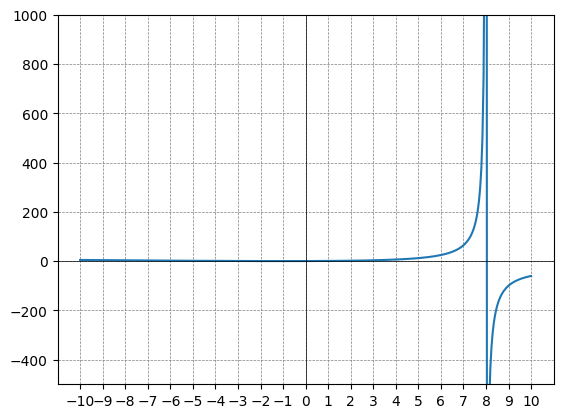

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Make sure to avoid x = 8 because it would make the denominator 0 and the function undefined
x = x[x != 8]

# Define the function
y = (x + 1) ** 2 / (8 - x)

# Create the plot
plt.plot(x, y)

# Add x and y axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Set x ticks
plt.ylim(-500, 1000)
plt.xticks(np.arange(-10, 11, step=1))

# Show the plot
plt.show()

### sin, cos, tan graph

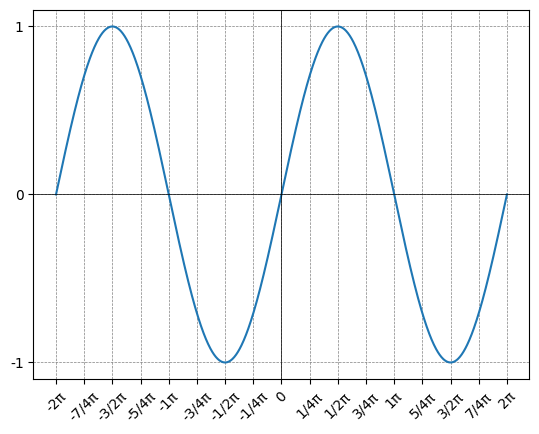

In [18]:
"""sin"""

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Generate a range for x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Compute y values
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add x and y axes
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Set denser x ticks to represent the multiples of pi/4
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi / 4, np.pi / 4)
xtick_labels = [f"{Fraction(x / np.pi).limit_denominator()}π" for x in xticks]

# Replace '0π' with '0'
xtick_labels = [label if label != "0π" else "0" for label in xtick_labels]

plt.xticks(xticks, xtick_labels, rotation=45)  # set rotation to 45 degrees
plt.yticks([-1, 0, 1], ["-1", "0", "1"])

# Show the plot
plt.show()

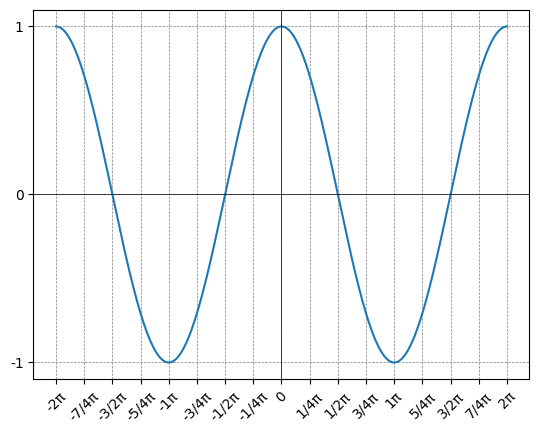

In [19]:
"""cos"""

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Generate a range for x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Compute y values
y = np.cos(x)

# Create the plot
plt.plot(x, y)

# Add x and y axes
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Set denser x ticks to represent the multiples of pi/4
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi / 4, np.pi / 4)
xtick_labels = [f"{Fraction(x / np.pi).limit_denominator()}π" for x in xticks]

# Replace '0π' with '0'
xtick_labels = [label if label != "0π" else "0" for label in xtick_labels]

plt.xticks(xticks, xtick_labels, rotation=45)  # set rotation to 45 degrees
plt.yticks([-1, 0, 1], ["-1", "0", "1"])

# Show the plot
plt.show()

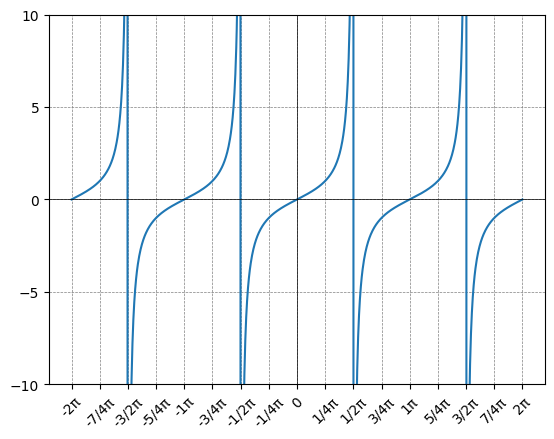

In [20]:
"""tan"""

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Generate x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
x = x[(x % np.pi != np.pi / 2)]  # avoid discontinuities at x = ±pi/2, ±3pi/2,...

# Compute y values
y = np.tan(x)

# Create the plot
plt.plot(x, y)

# Drawing x and y axes lines
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

# Setting limits on y-axis to avoid extreme values during discontinuities
plt.ylim([-10, 10])

# Set denser x ticks to represent the multiples of pi/4
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi / 4, np.pi / 4)
xtick_labels = [f"{Fraction(x / np.pi).limit_denominator()}π" for x in xticks]

# Replace '0π' with '0'
xtick_labels = [label if label != "0π" else "0" for label in xtick_labels]

plt.xticks(xticks, xtick_labels, rotation=45)  # set rotation to 45 degrees
plt.yticks(np.arange(-10, 11, 5))

# Adding grid lines
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

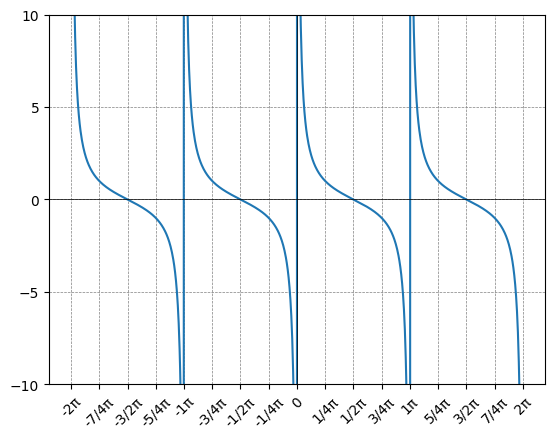

In [2]:
"""cot"""

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Generate x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
x = x[(x % np.pi != 0)]  # avoid discontinuities at x = 0, ±π, ±2π,...

# Compute y values
y = 1 / np.tan(x)

# Create the plot
plt.plot(x, y)

# Drawing x and y axes lines
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

# Setting limits on y-axis to avoid extreme values during discontinuities
plt.ylim([-10, 10])

# Set denser x ticks to represent the multiples of pi/4
xticks = np.arange(-2 * np.pi, 2 * np.pi + np.pi / 4, np.pi / 4)
xtick_labels = [f"{Fraction(x / np.pi).limit_denominator()}π" for x in xticks]

# Replace '0π' with '0'
xtick_labels = [label if label != "0π" else "0" for label in xtick_labels]

plt.xticks(xticks, xtick_labels, rotation=45)  # set rotation to 45 degrees
plt.yticks(np.arange(-10, 11, 5))

# Adding grid lines
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

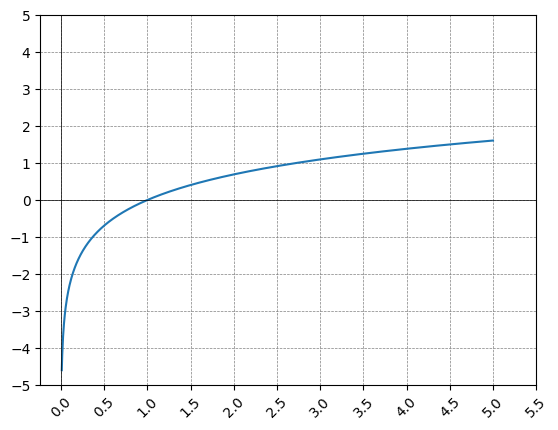

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0.01, 5, 1000)  # start from 0.01 to avoid log(0)

# Compute y values
y = np.log(x)

# Create the plot
plt.plot(x, y)

# Drawing x and y axes lines
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

# Setting limits on y-axis
plt.ylim([-5, 5])

# Set denser x ticks to represent the multiples of 1
xticks = np.arange(0, 6, 0.5)
plt.xticks(xticks, rotation=45)  # set rotation to 45 degrees
plt.yticks(np.arange(-5, 6, 1))

# Adding grid lines
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

## LaTex of Limit

### Pythagorean trigonometric identity 毕达哥拉斯三角恒等式

$$\sin ^{2} \theta+\cos ^{2} \theta=1$$

### Sum Formula for sine

$$\sin(a + b) = \sin(a)\cos(b) + \cos(a)\sin(b)$$

$$\sin(a - b) = \sin(a)\cos(b) - \cos(a)\sin(b)$$

$$\cos(a + b) = \cos(a)\cos(b) - \sin(a)\sin(b)$$

$$\cos(a - b) = \cos(a)\cos(b) + \sin(a)\sin(b)$$

---

$\displaystyle\lim_{x \to 4} \frac{x^2 - x - 12}{x - 4}$ is continuous for all real number other than $x$ = 4 which means $g$ is continuous for all real numbers other than $x$ = 4.

In order for $g$ to also be continuous at $x$ = 4, the following equality must hold:

$$\lim_{x \to 4} g(x) = g(4)$$

$$\lim_{x \to -\infty}\frac{\sqrt{x^8 - 5x^3}}{3x^4 + 4}$$

$$\lim_{x \to -\infty}\frac{3x}{\sqrt{16x^2 - 9x}}$$

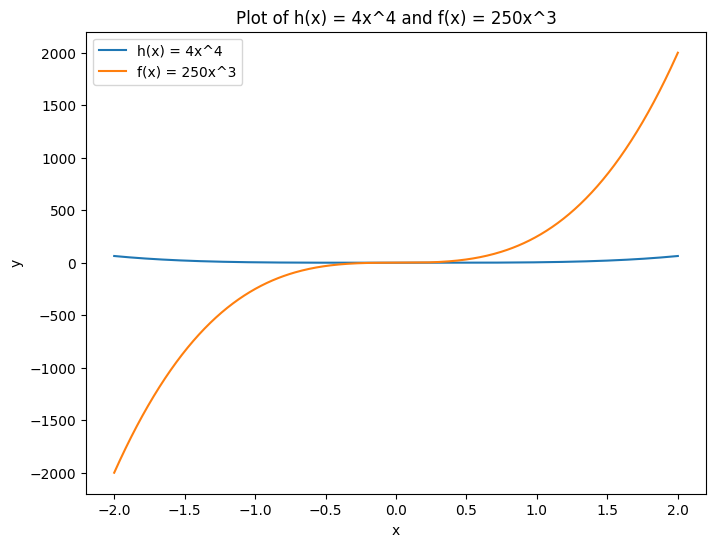

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values from -2 to 2
x = np.linspace(-2, 2, 400)

# Define h(x) and f(x)
h = 4 * (x ** 4)
f = 250 * (x ** 3)

# Generate the plot
plt.figure(figsize=(8, 6))

# Plot h(x) and f(x)
plt.plot(x, h, label="h(x) = 4x^4")
plt.plot(x, f, label="f(x) = 250x^3")

# Create labels, title and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of h(x) = 4x^4 and f(x) = 250x^3")
plt.legend()

# Show the plot
plt.show()